In [1]:
import pyshtools
import pygmt
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr



In [2]:
clm_lcs, lmax = pyshtools.shio.shread('./shc/Langlais++_Mars.cof')

clmm = pyshtools.SHMagCoeffs.from_array(clm_lcs, r0=3389500)

clmm.info()

kind = 'real'
normalization = 'schmidt'
csphase = 1
lmax = 134
r0 (m) = 3389500
error_kind = None
header = None
header2 = None
units = 'nT'
year = None


In [3]:
magg = clmm.expand(lmax=150,a=clmm.r0+200000.)


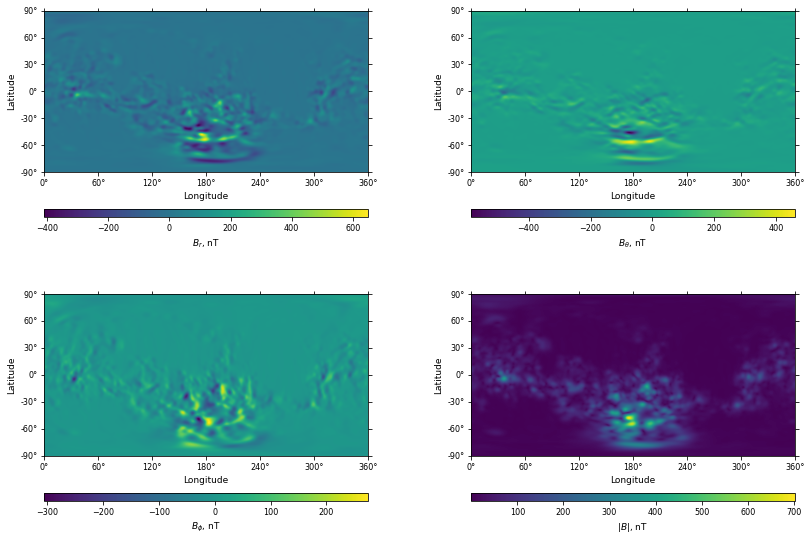

In [4]:
fig,ax = magg.plot(show=False)
fig.set_figwidth(12)
fig.set_figheight(8)

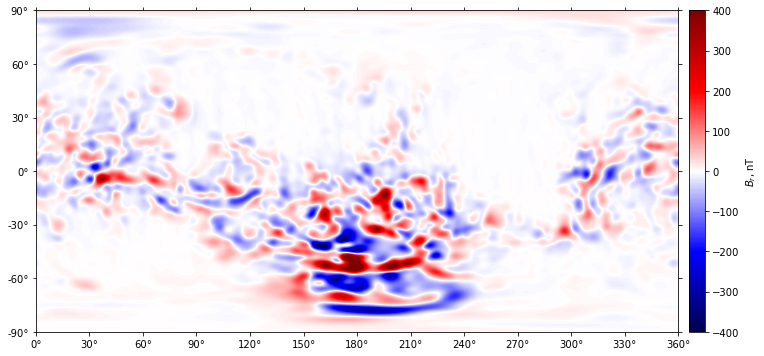

In [5]:
fig,ax = magg.plot_rad(show=False, cmap='seismic', cmap_limits=[-400,400])
fig.set_figwidth(12)
fig.set_figheight(8)

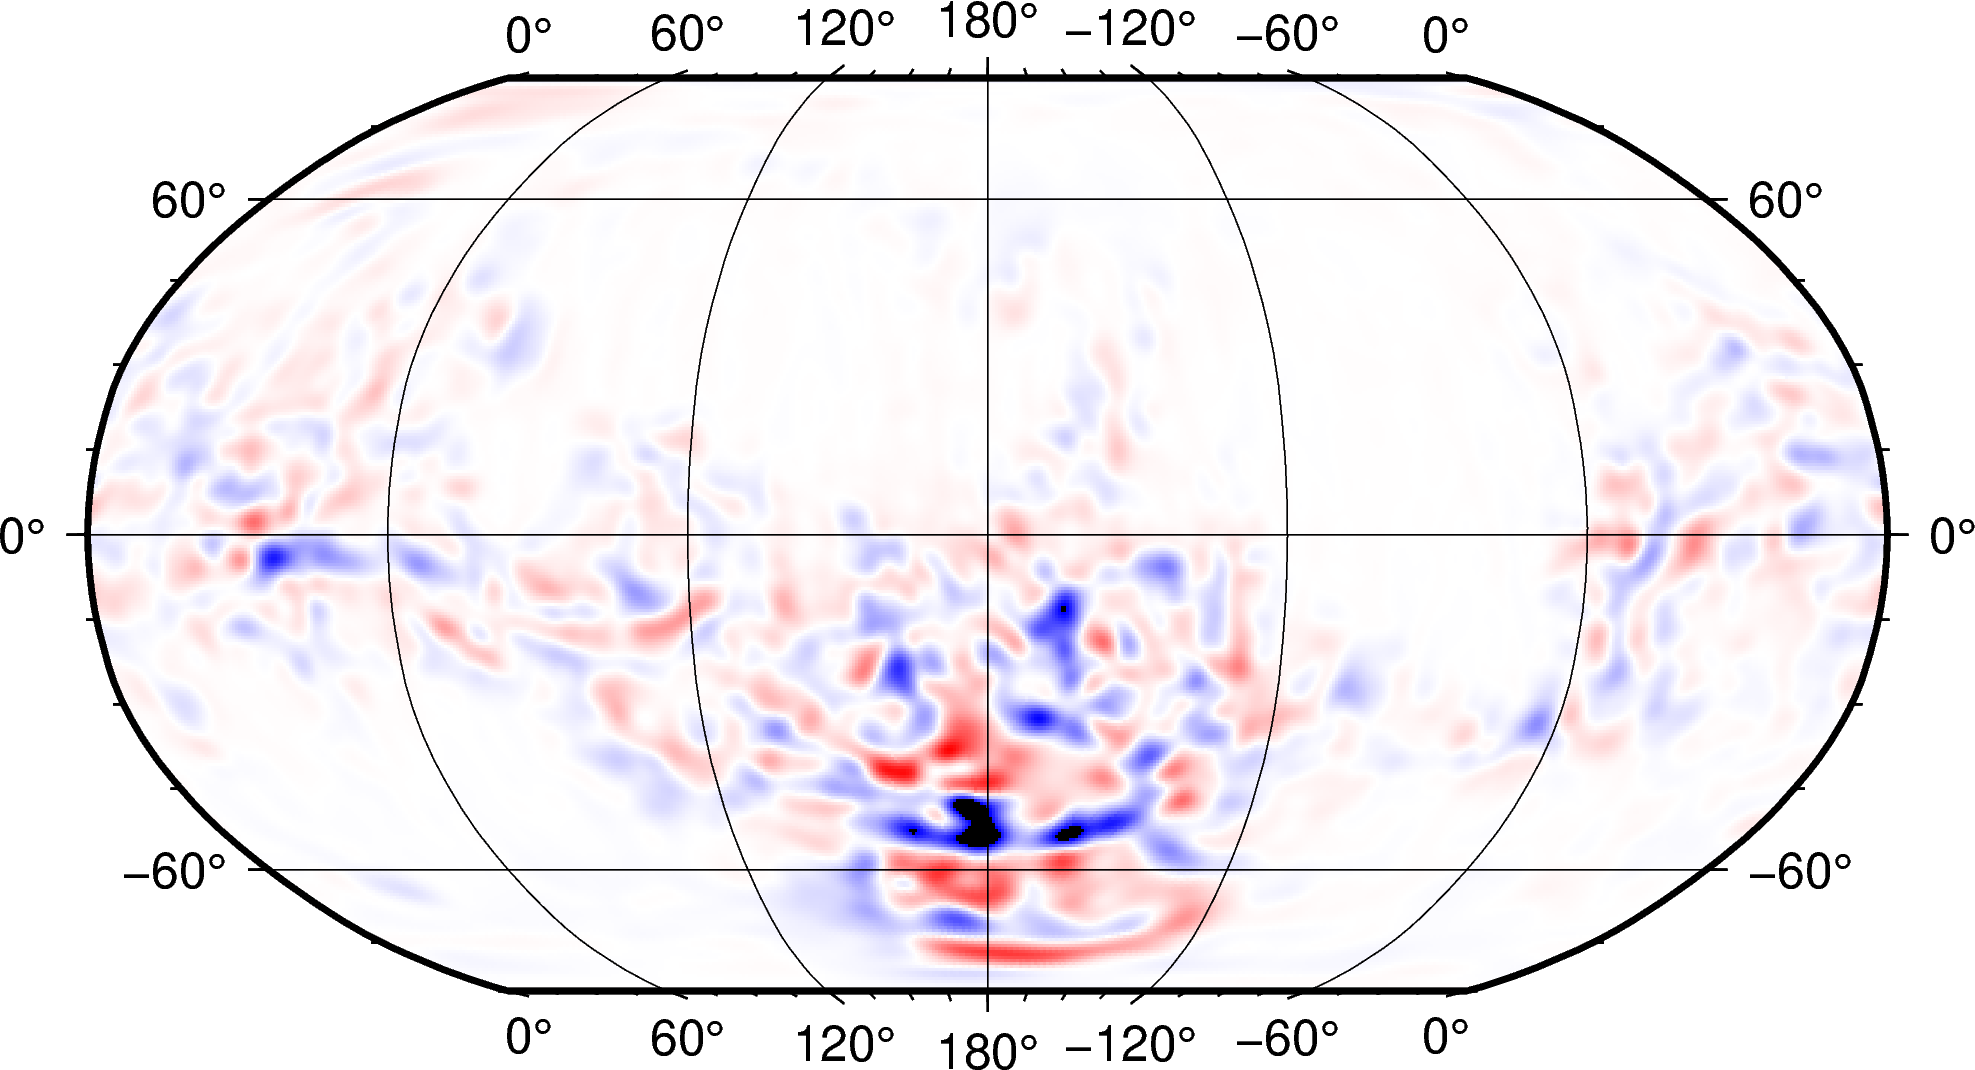

In [6]:
fig = pygmt.Figure()

pygmt.config(COLOR_FOREGROUND='black', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='polar', series='-400/400', reverse=True)

fig.grdimage(region='g', projection='N6i', grid=magg.rad.to_xarray(), n='b')
fig.basemap(frame='afg')
fig.show(width=1000)


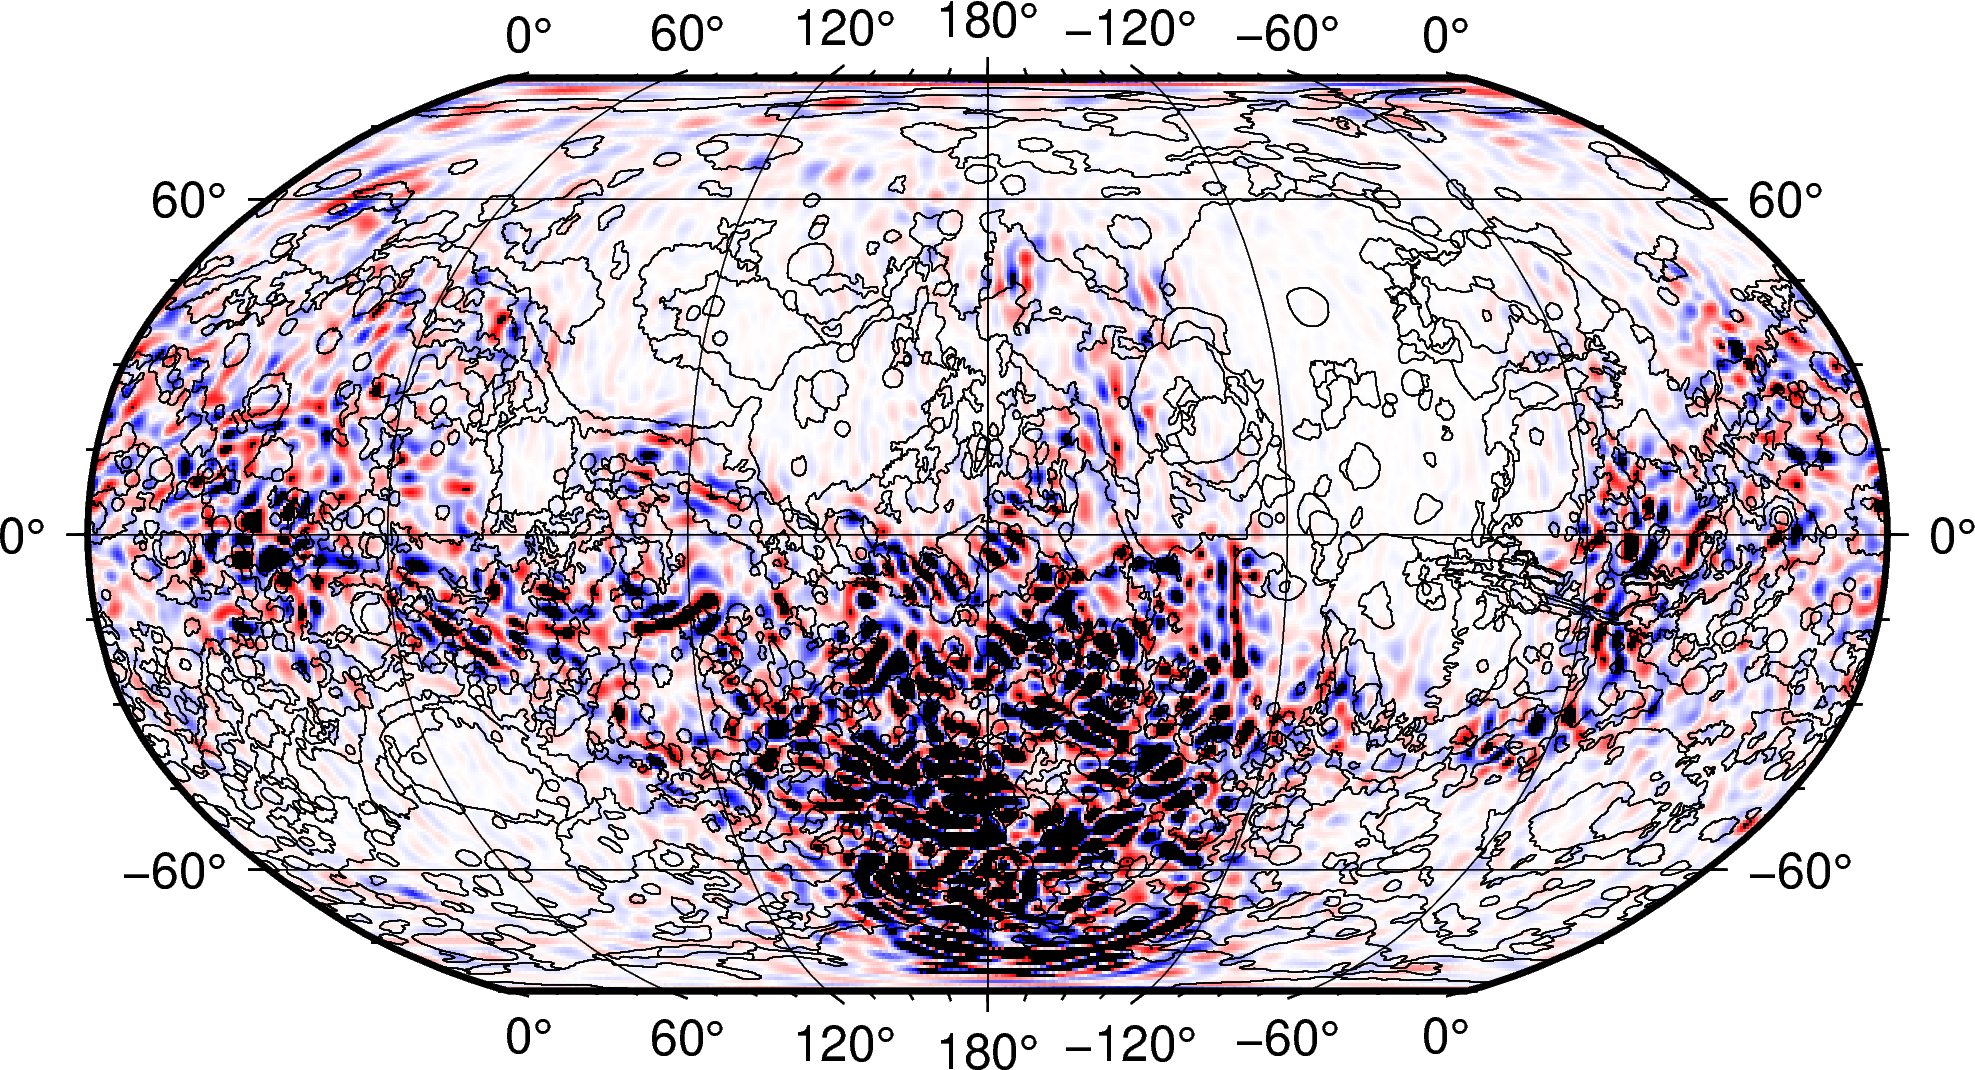

In [15]:
magg = clmm.expand(lmax=150,a=clmm.r0)

fig = pygmt.Figure()

pygmt.config(COLOR_FOREGROUND='black', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='polar', series='-1000/1000', reverse=True)

fig.grdimage(region='g', projection='N6i', grid=magg.rad.to_xarray(), n='b')
fig.plot(data='geology/SIM3292_Shapefiles/SIM3292_Global_Geology.shp')
fig.basemap(frame='afg')
fig.show(width=1000)